# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv('/content/hyundi - hyundi.csv', index_col=0)

In [54]:
df

,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
model,,,,,,,,
I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...
I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [36]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
model,,,
I20,7999,2017,17307
Tucson,14499,2016,25233
Tucson,11399,2016,37877
I10,6499,2016,23789
IX35,10199,2015,33177
...,...,...,...
I30,8680,2016,25906
I40,7830,2015,59508
I10,6830,2017,13810


In [37]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init ='random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
            )

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

        price  year  mileage  cluster_label
model                                      
I20      7999  2017    17307              2
Tucson  14499  2016    25233              0
Tucson  11399  2016    37877              0
I10      6499  2016    23789              0
IX35    10199  2015    33177              0
...       ...   ...      ...            ...
I30      8680  2016    25906              0
I40      7830  2015    59508              1
I10      6830  2017    13810              2
Tucson  13994  2018    23313              0
Tucson  15999  2016    11472              2

[4860 rows x 4 columns]


<ipython-input-37-4a9f98038b67>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [38]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[10651.58476518,  2016.36597938, 30198.3069874 ],
       [ 7902.9375    ,  2014.04241071, 60993.52901786],
       [14939.0300075 ,  2018.1084021 ,  9141.35633908]])

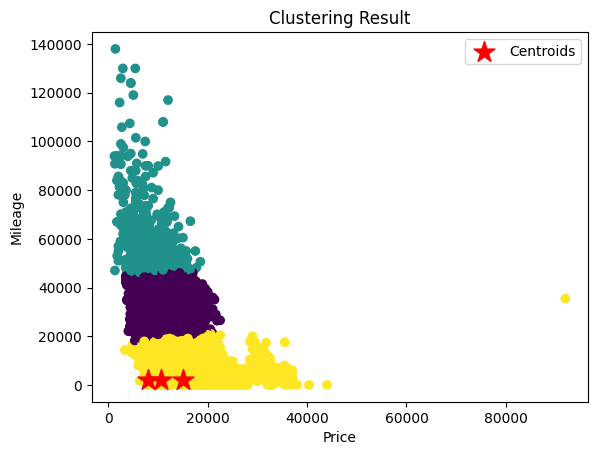

In [39]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(df_new['price'], df_new['mileage'] , c=df_new['cluster_label'], cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(centers[:, 0], centers[:, 2], marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

In [59]:
df_new = df[['price','year']]

df_new

,price,year
model,,
I20,7999,2017
Tucson,14499,2016
Tucson,11399,2016
I10,6499,2016
IX35,10199,2015
...,...,...
I30,8680,2016
I40,7830,2015
I10,6830,2017


In [60]:
km = KMeans(n_clusters=2,
            init ='random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
            )

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

        price  year  cluster_label
model                             
I20      7999  2017              0
Tucson  14499  2016              1
Tucson  11399  2016              0
I10      6499  2016              0
IX35    10199  2015              0
...       ...   ...            ...
I30      8680  2016              0
I40      7830  2015              0
I10      6830  2017              0
Tucson  13994  2018              1
Tucson  15999  2016              1

[4860 rows x 3 columns]


<ipython-input-60-de925bf413f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [61]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[ 8943.12301861,  2016.40902826],
       [18392.59141982,  2018.14300306]])

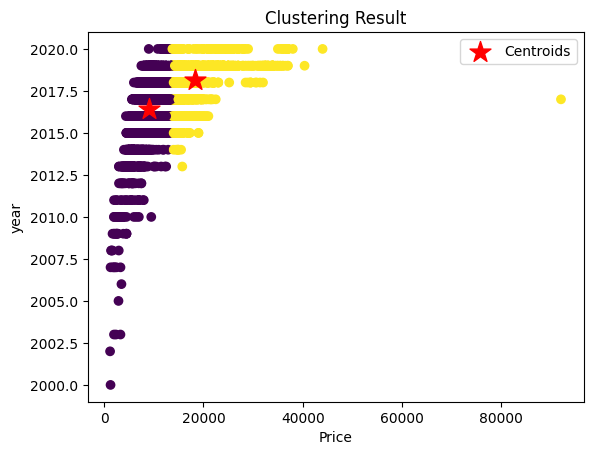

In [62]:
import matplotlib.pyplot as plt
# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(df_new['price'], df_new['year'] , c=df_new['cluster_label'], cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('year')
plt.title('Clustering Result')
plt.legend()
plt.show()

In [44]:
df_new = df[['price','year','tax(£)', 'mileage']]

df_new

,price,year,tax(£),mileage
model,,,,
I20,7999,2017,145,17307
Tucson,14499,2016,235,25233
Tucson,11399,2016,30,37877
I10,6499,2016,20,23789
IX35,10199,2015,160,33177
...,...,...,...,...
I30,8680,2016,0,25906
I40,7830,2015,30,59508
I10,6830,2017,20,13810


In [45]:
km = KMeans(n_clusters=4,
            init ='random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
            )

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

        price  year  tax(£)  mileage  cluster_label
model                                              
I20      7999  2017     145    17307              3
Tucson  14499  2016     235    25233              3
Tucson  11399  2016      30    37877              2
I10      6499  2016      20    23789              3
IX35    10199  2015     160    33177              2
...       ...   ...     ...      ...            ...
I30      8680  2016       0    25906              2
I40      7830  2015      30    59508              1
I10      6830  2017      20    13810              3
Tucson  13994  2018     145    23313              3
Tucson  15999  2016     125    11472              0

[4860 rows x 5 columns]


<ipython-input-45-cb3e1cf644e7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [46]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[17735.08617095,  2018.68241835,   142.81097985,  4797.29673384],
       [ 7556.84782609,  2013.68944099,   106.59937888, 66098.10869565],
       [10510.80711044,  2016.15960666,   105.51437216, 35168.27155825],
       [11320.34665166,  2017.15700619,   117.87000563, 16737.67304446]])

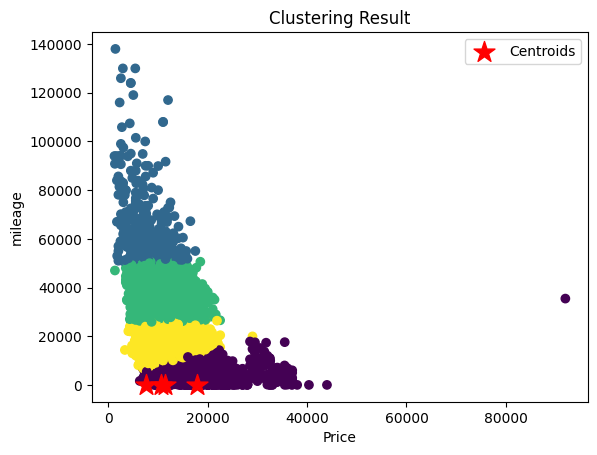

In [47]:
# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(df_new['price'], df_new['mileage'] , c=df_new['cluster_label'], cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(centers[:, 0], centers[:, 2], marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()